In [1]:
import numpy as np
import sklearn
import tensorflow_hub as hub
from matplotlib import pyplot as plt

We use pre-trained universal sentence encoders here. Other good similarity measures are included here: https://medium.com/@adriensieg/text-similarities-da019229c894

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


[[1.         0.49622822 0.13574755 0.24164265 0.29750645 0.22691868]
 [0.49622822 0.99999994 0.09357402 0.10283317 0.20687057 0.15031934]
 [0.13574755 0.09357402 0.99999994 0.3834801  0.16328706 0.21761815]
 [0.24164265 0.10283317 0.3834801  1.         0.08307708 0.16043627]
 [0.29750645 0.20687057 0.16328706 0.08307708 0.9999998  0.5633582 ]
 [0.22691868 0.15031934 0.21761815 0.16043627 0.5633582  1.        ]]


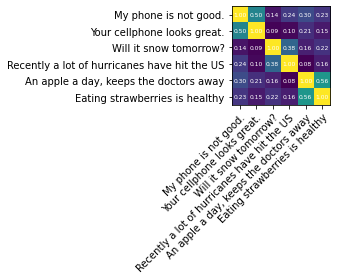

In [2]:
import tensorflow.compat.v1 as tf

#To make tf 2.0 compatible with tf1.0 code, we disable the tf2.0 functionalities
tf.disable_eager_execution()

module_url = "https://tfhub.dev/google/universal-sentence-encoder/1?tf-hub-format=compressed"

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)

# sample text
messages = [
# Smartphones
"My phone is not good.",
"Your cellphone looks great.",

# Weather
"Will it snow tomorrow?",
"Recently a lot of hurricanes have hit the US",

# Food and health
"An apple a day, keeps the doctors away",
"Eating strawberries is healthy",
]
    
def heatmap(x_labels, y_labels, values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", fontsize=6)
    fig.tight_layout()
    plt.show()

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})

    corr = np.inner(message_embeddings_, message_embeddings_)
    print(corr)
    heatmap(messages, messages, corr)



## Testing Classification

Based on this notebook: https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Solving%20A%20Simple%20Classification%20Problem%20with%20Python.ipynb

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fruits = pd.read_table('fruits.txt')
fruits.head()

FileNotFoundError: [Errno 2] No such file or directory: 'fruits.txt'